## Importing Libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import plotly
import wave
import sys
plt.rcParams['figure.figsize'] = [16,12]
plt.rcParams.update({'font.size': 18})

## Generating Sample Wave

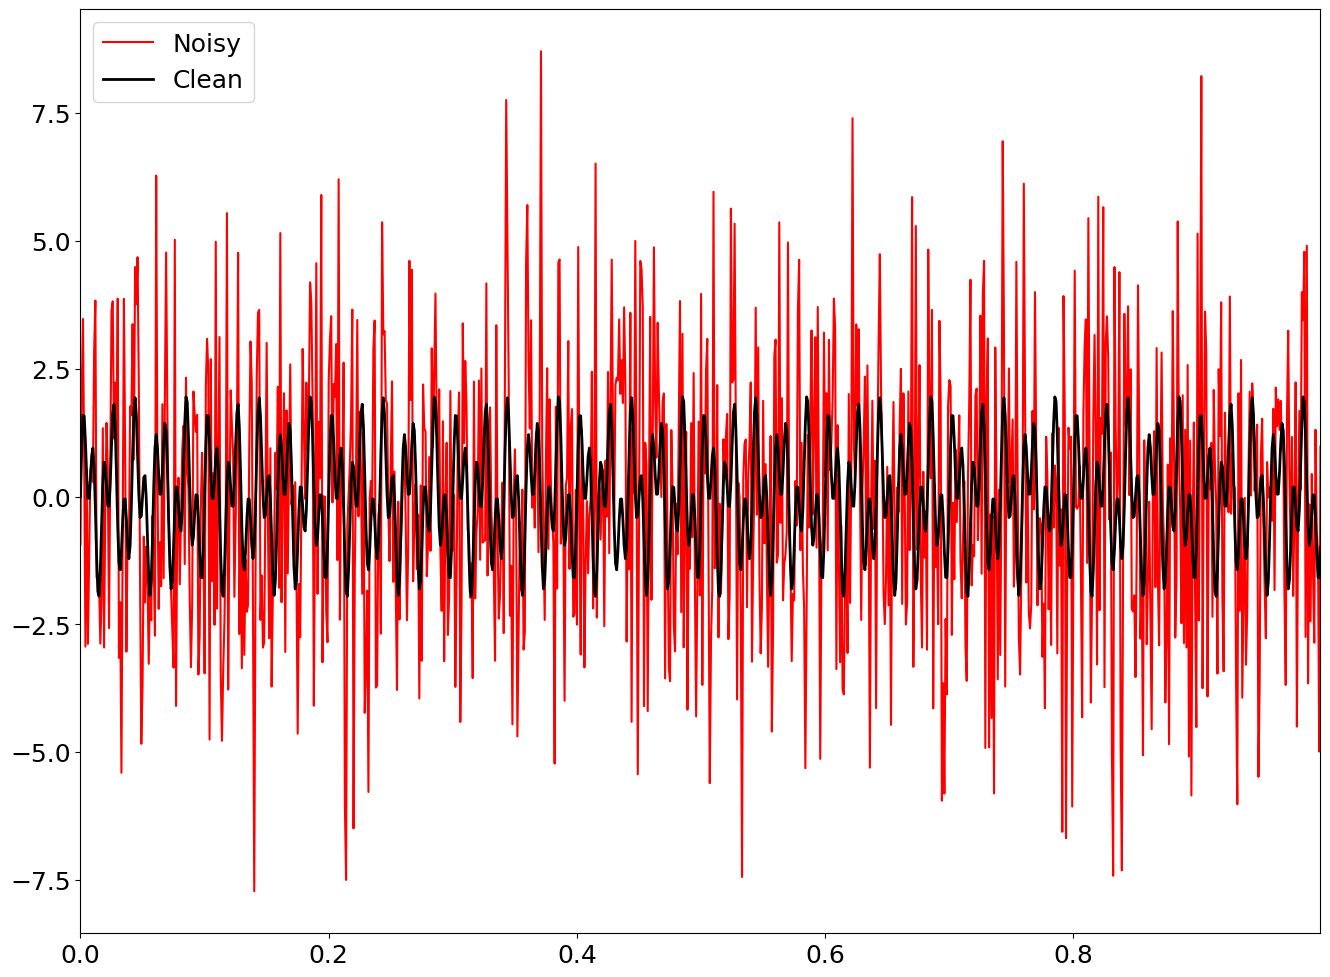

In [ ]:
dt = 0.001
t = np.arange(0, 1, dt)
f = np.sin(2*np.pi*50*t) + np.sin(2*np.pi*120*t)
f_clean = f
f = f + 2.5*np.random.randn(len(t))

plt.plot(t, f, color='red', linewidth=1.5, label='Noisy')
plt.plot(t, f_clean, color='k', linewidth=2, label='Clean')
plt.xlim(t[0], t[-1])
plt.legend()

## Denoising via Fast Fourier Transform

/usr/local/lib/python3.10/dist-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


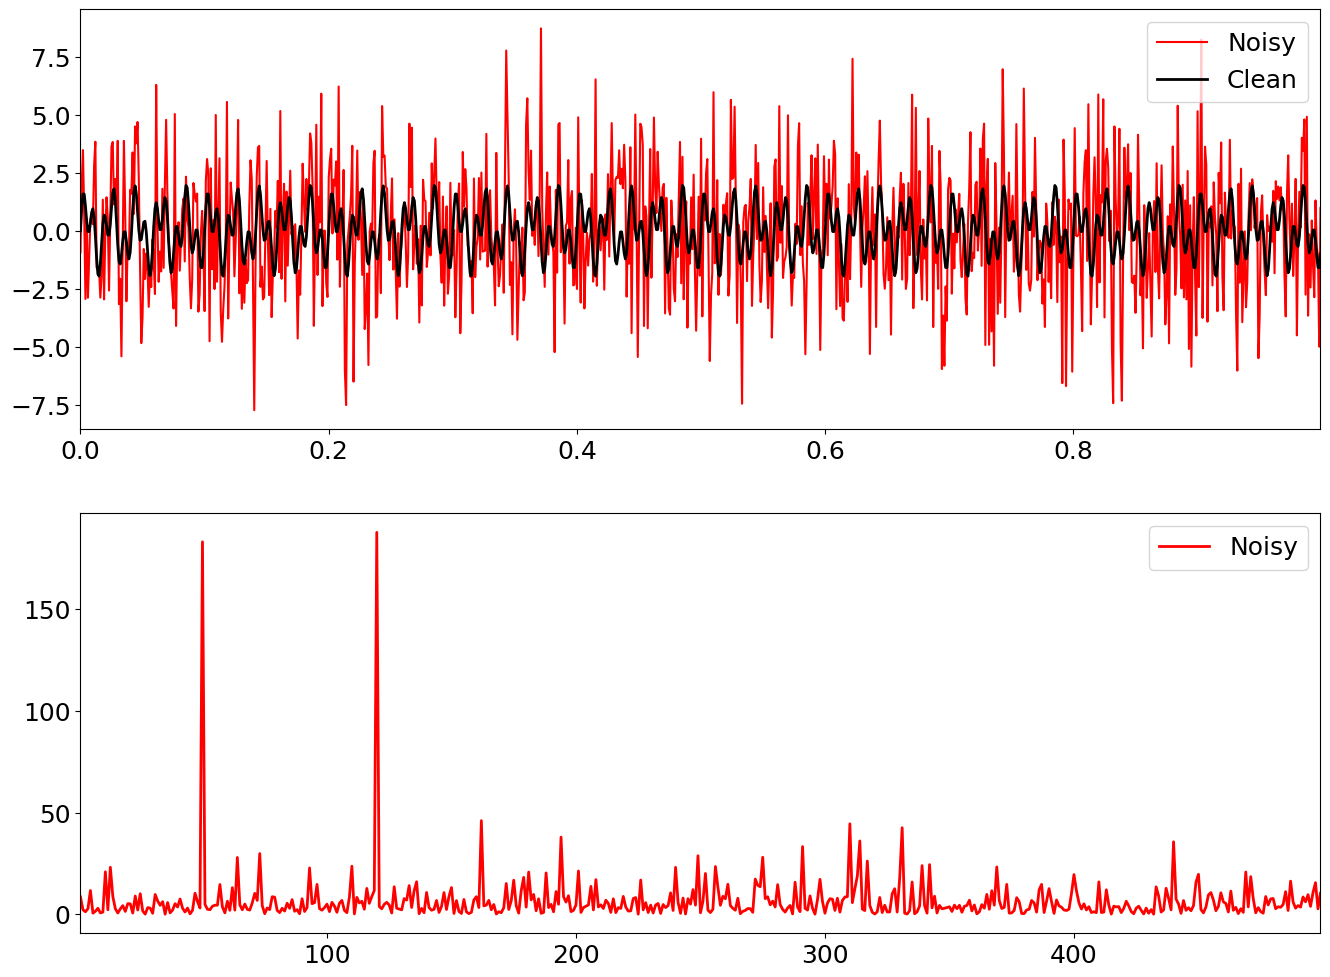

In [ ]:
n = len(t)
fhat = np.fft.fft(f, n)
PSD = fhat * np.conj(fhat) / n
freq = (1 / (dt*n)) * np.arange(n)
L = np.arange(1, np.floor(n / 2), dtype='int')

fig, axs = plt.subplots(2, 1)

plt.sca(axs[0])
plt.plot(t, f, color='red', linewidth=1.5, label='Noisy')
plt.plot(t, f_clean, color='k', linewidth=2, label='Clean')
plt.xlim(t[0], t[-1])
plt.legend()

plt.sca(axs[1])
plt.plot(freq[L], PSD[L], color='red', linewidth=2, label='Noisy')
plt.xlim(freq[L[0]], freq[L[-1]])
plt.legend()

plt.show()

In [ ]:
indices = PSD > 100
PSDclean = PSD * indices
fhat = indices * fhat
ffilt = np.fft.ifft(fhat)

/usr/local/lib/python3.10/dist-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


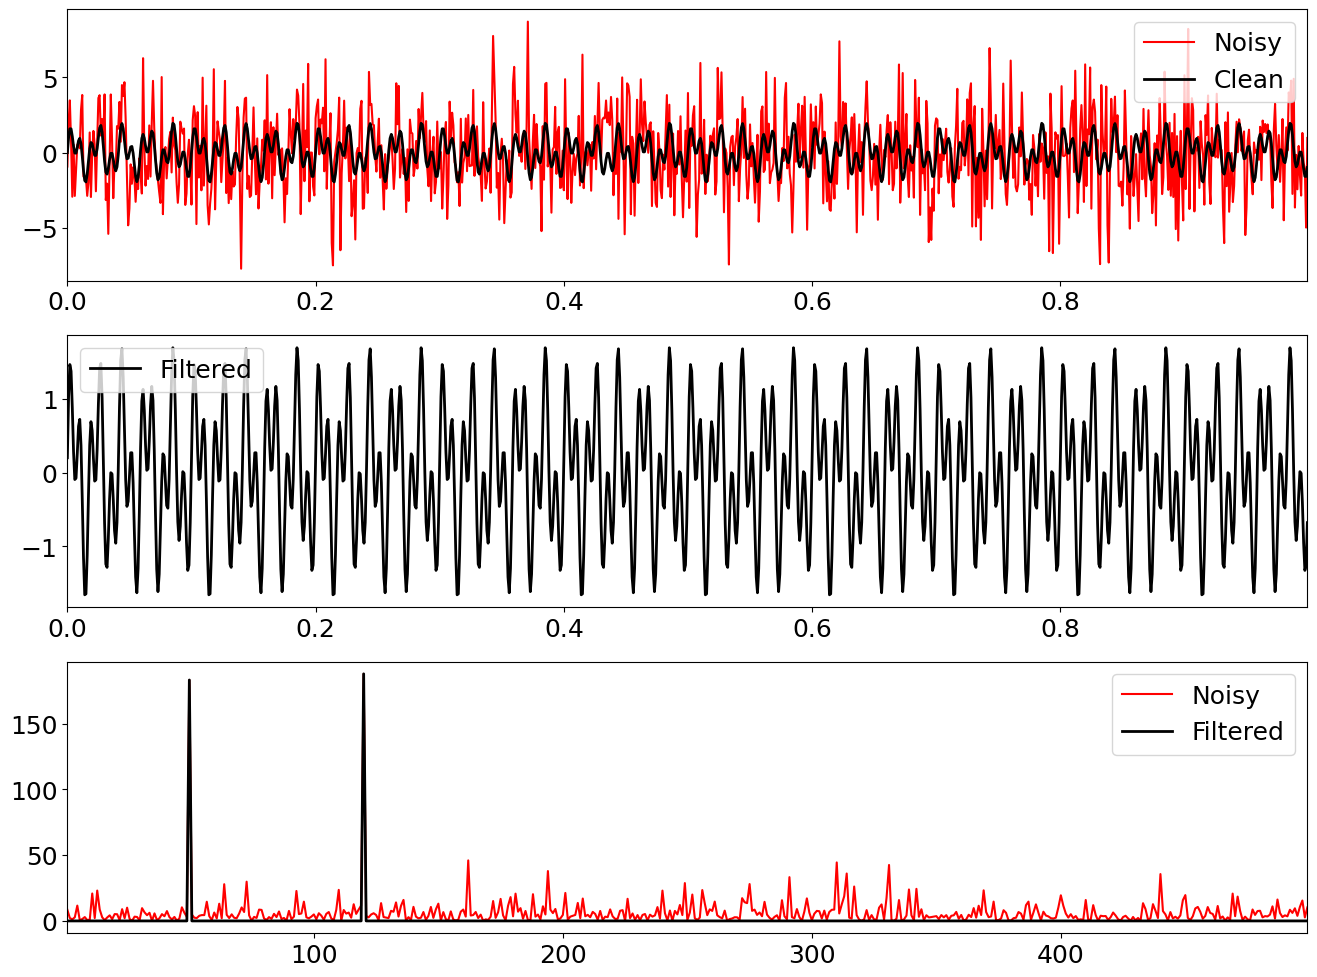

In [ ]:
fig, axs = plt.subplots(3, 1)

plt.sca(axs[0])
plt.plot(t, f, color='red', linewidth=1.5, label='Noisy')
plt.plot(t, f_clean, color='k', linewidth=2, label='Clean')
plt.xlim(t[0], t[-1])
plt.legend()

plt.sca(axs[1])
plt.plot(t, ffilt, color='k', linewidth=2, label='Filtered')
plt.xlim(t[0], t[-1])
plt.legend()

plt.sca(axs[2])
plt.plot(freq[L], PSD[L], color='red', linewidth=1.5, label='Noisy')
plt.plot(freq[L], PSDclean[L], color='k', linewidth=2, label='Filtered')
plt.xlim(freq[L[0]], freq[L[-1]])
plt.legend()

plt.show()

## Testing on Sample .wav File

In [ ]:
# RUN ONCE
# !git clone https://github.com/rbsolas/Signal-Processing.git
%ls
%cd Signal-Processing/

Cloning into 'Signal-Processing'...
remote: Enumerating objects: 4, done.
remote: Counting objects: 100% (4/4), done.
remote: Compressing objects: 100% (2/2), done.
remote: Total 4 (delta 0), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (4/4), 5.06 MiB | 20.79 MiB/s, done.
sample_data/  Signal-Processing/
/content/Signal-Processing


In [ ]:
!git pull

remote: Enumerating objects: 7, done.
remote: Counting objects: 100% (7/7), done.
remote: Compressing objects: 100% (2/2), done.
remote: Total 4 (delta 0), reused 4 (delta 0), pack-reused 0
Unpacking objects: 100% (4/4), 3.05 MiB | 9.23 MiB/s, done.
From https://github.com/rbsolas/Signal-Processing
   17449ce..2f6b0fa  main       -> origin/main
Updating 17449ce..2f6b0fa
Fast-forward
 wav/goat.wav | Bin 5188682 -> 3459366 bytes
 1 file changed, 0 insertions(+), 0 deletions(-)


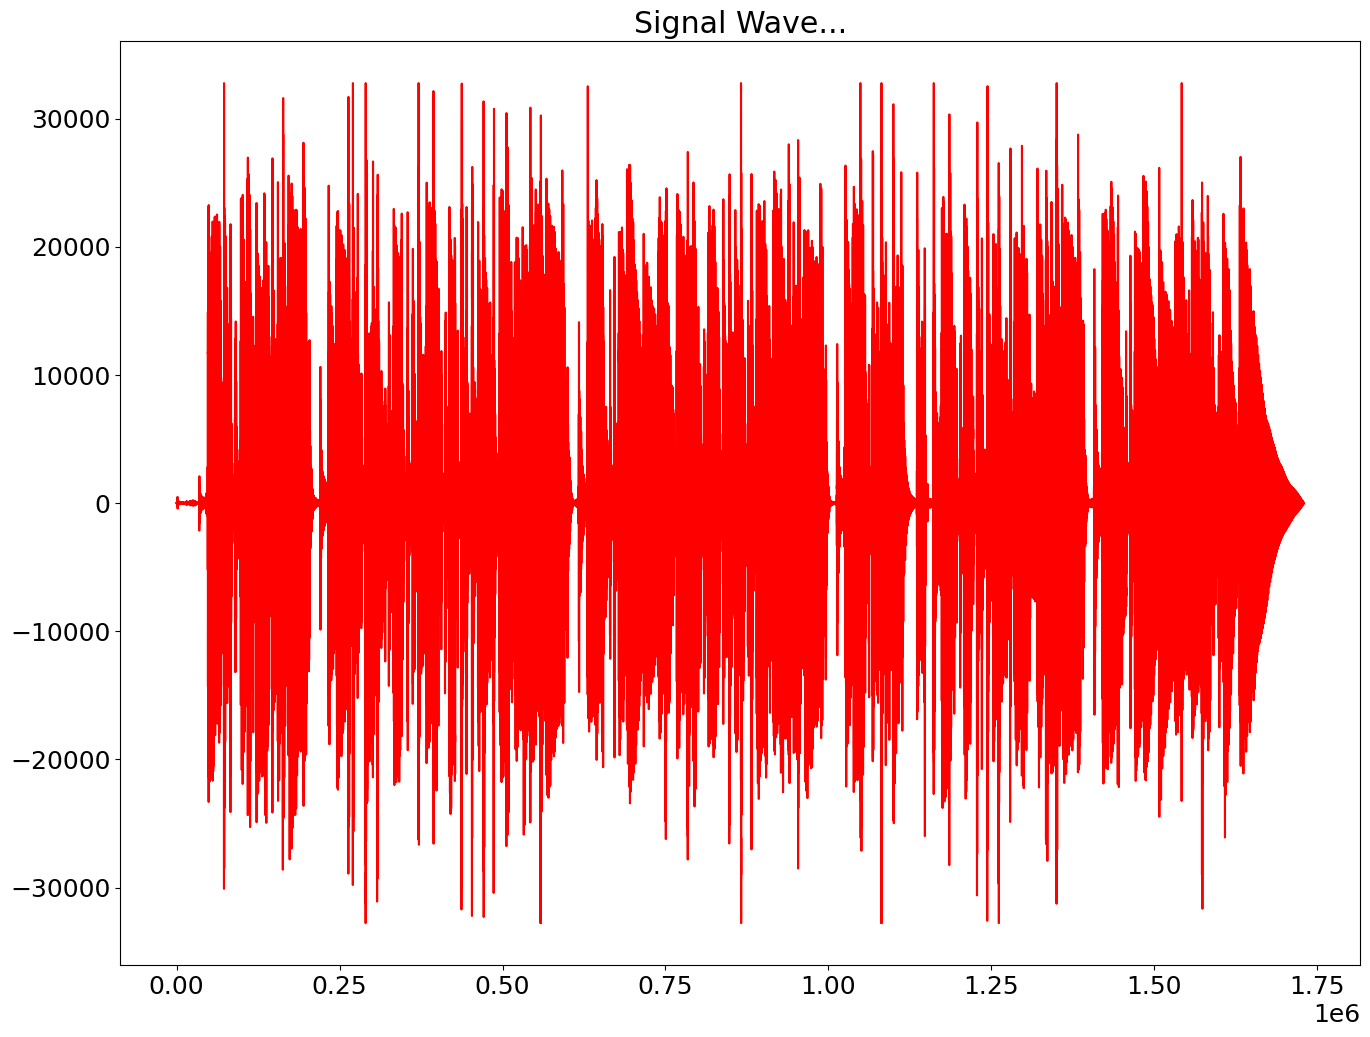

In [ ]:
spf = wave.open("wav/goat.wav", "r")

# Extract Raw Audio from Wav File
signal = spf.readframes(-1)
signal = np.frombuffer(signal, dtype=np.int16)


# If Stereo
if spf.getnchannels() == 2:
    print("Just mono files")
    sys.exit(0)

plt.figure(1)
plt.title("Signal Wave...")
plt.plot(signal, color='red')
plt.show()

In [ ]:
# Transform file into something readable